In [1]:
! git clone 'https://github.com/sathappanPR/Classification_of_Mushroom'         # Importing csv file from Github

fatal: destination path 'Classification_of_Mushroom' already exists and is not an empty directory.


In [18]:
import pandas as pd                                                             # Importing Libarary
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle

In [3]:
com = pd.read_csv('/content//Classification_of_Mushroom/mushrooms.csv')         # Reading data
com.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
com.drop("stalk-root",axis=1,inplace=True)

In [5]:
for i in com.columns:
    print(i, ":")
    print()
    print(com[i].unique())
    print()
    print(com[i].nunique())
    print("----------------------------------------")

class :

['p' 'e']

2
----------------------------------------
cap-shape :

['x' 'b' 's' 'f' 'k' 'c']

6
----------------------------------------
cap-surface :

['s' 'y' 'f' 'g']

4
----------------------------------------
cap-color :

['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

10
----------------------------------------
bruises :

['t' 'f']

2
----------------------------------------
odor :

['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

9
----------------------------------------
gill-attachment :

['f' 'a']

2
----------------------------------------
gill-spacing :

['c' 'w']

2
----------------------------------------
gill-size :

['n' 'b']

2
----------------------------------------
gill-color :

['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

12
----------------------------------------
stalk-shape :

['e' 't']

2
----------------------------------------
stalk-surface-above-ring :

['s' 'f' 'k' 'y']

4
----------------------------------------
stalk-surface-below-ring :

['s' 'f' 'y' 'k'

In [6]:
class encoding:
  def com_encode(self):
    labelencoder=LabelEncoder()                                                     # Encoding Process
    for column in com.columns:
        com[column] = labelencoder.fit_transform(com[column])
    print(com.head(1))
object_encode = encoding()


In [7]:
object_encode.com_encode()

   class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0      1          5            2  ...                  2           3        5

[1 rows x 22 columns]


In [8]:
com.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,0,2,1,0,3,0,1



# VISUALIZATION

In [9]:
class visuals:

  def visualize(self):
    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(sns.distplot(com['gill-attachment']))
    print("-------------------------------------------------")

    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(sns.distplot(com['class']))
    print("-------------------------------------------------")
    
    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(plt.hist(com['gill-attachment']))
    print("-------------------------------------------------")
    
    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print( plt.hist(com['class']))
    print("-------------------------------------------------")
    
    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(sns.countplot('class',data = com))
    print("-------------------------------------------------")

    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(sns.barplot(y = 'cap-color', x = 'class',data = com))
    print("-------------------------------------------------")
    
    fig_dims = (5, 5);
    fig, ax = plt.subplots(figsize=fig_dims);
    print(sns.barplot(y = 'veil-color', x = 'class',data = com))
    print("-------------------------------------------------")

    print(sns.pairplot(com))
    print("-------------------------------------------------")
    
    corr=com.corr()
    top_corr_fearures=corr.index
    plt.figure(figsize=(20,20))
    s=sns.heatmap(com[top_corr_fearures].corr(),annot=True,cmap="CMRmap_r")
 

object_visuals = visuals()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------
(array([ 210.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       7914.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)
-------------------------------------------------
(array([4208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
       3916.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)
-------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------
AxesSubplot(0.125,0.125;0.775x0.755)
-------------------------------------------------
-------------------------------------------------


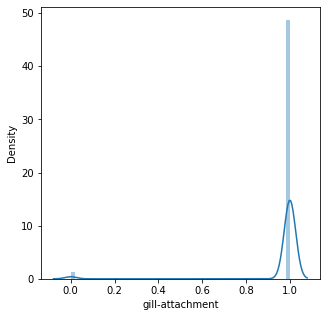

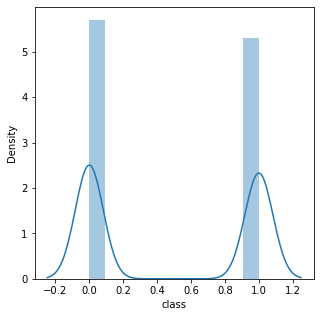

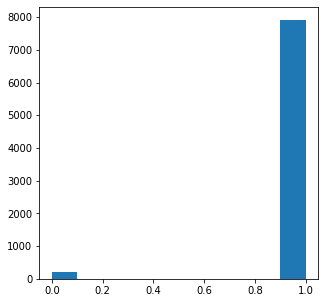

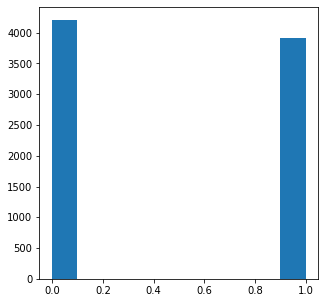

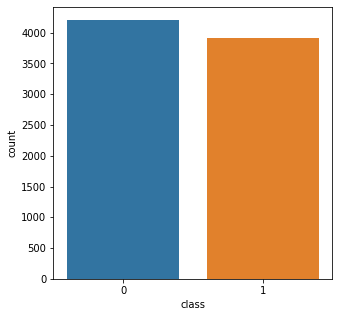

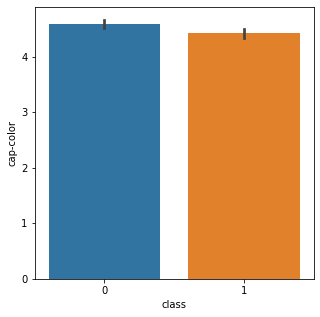

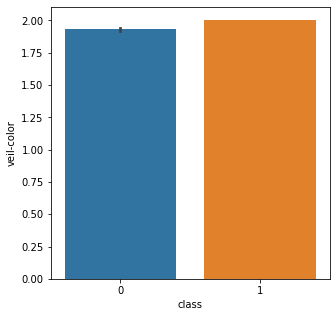

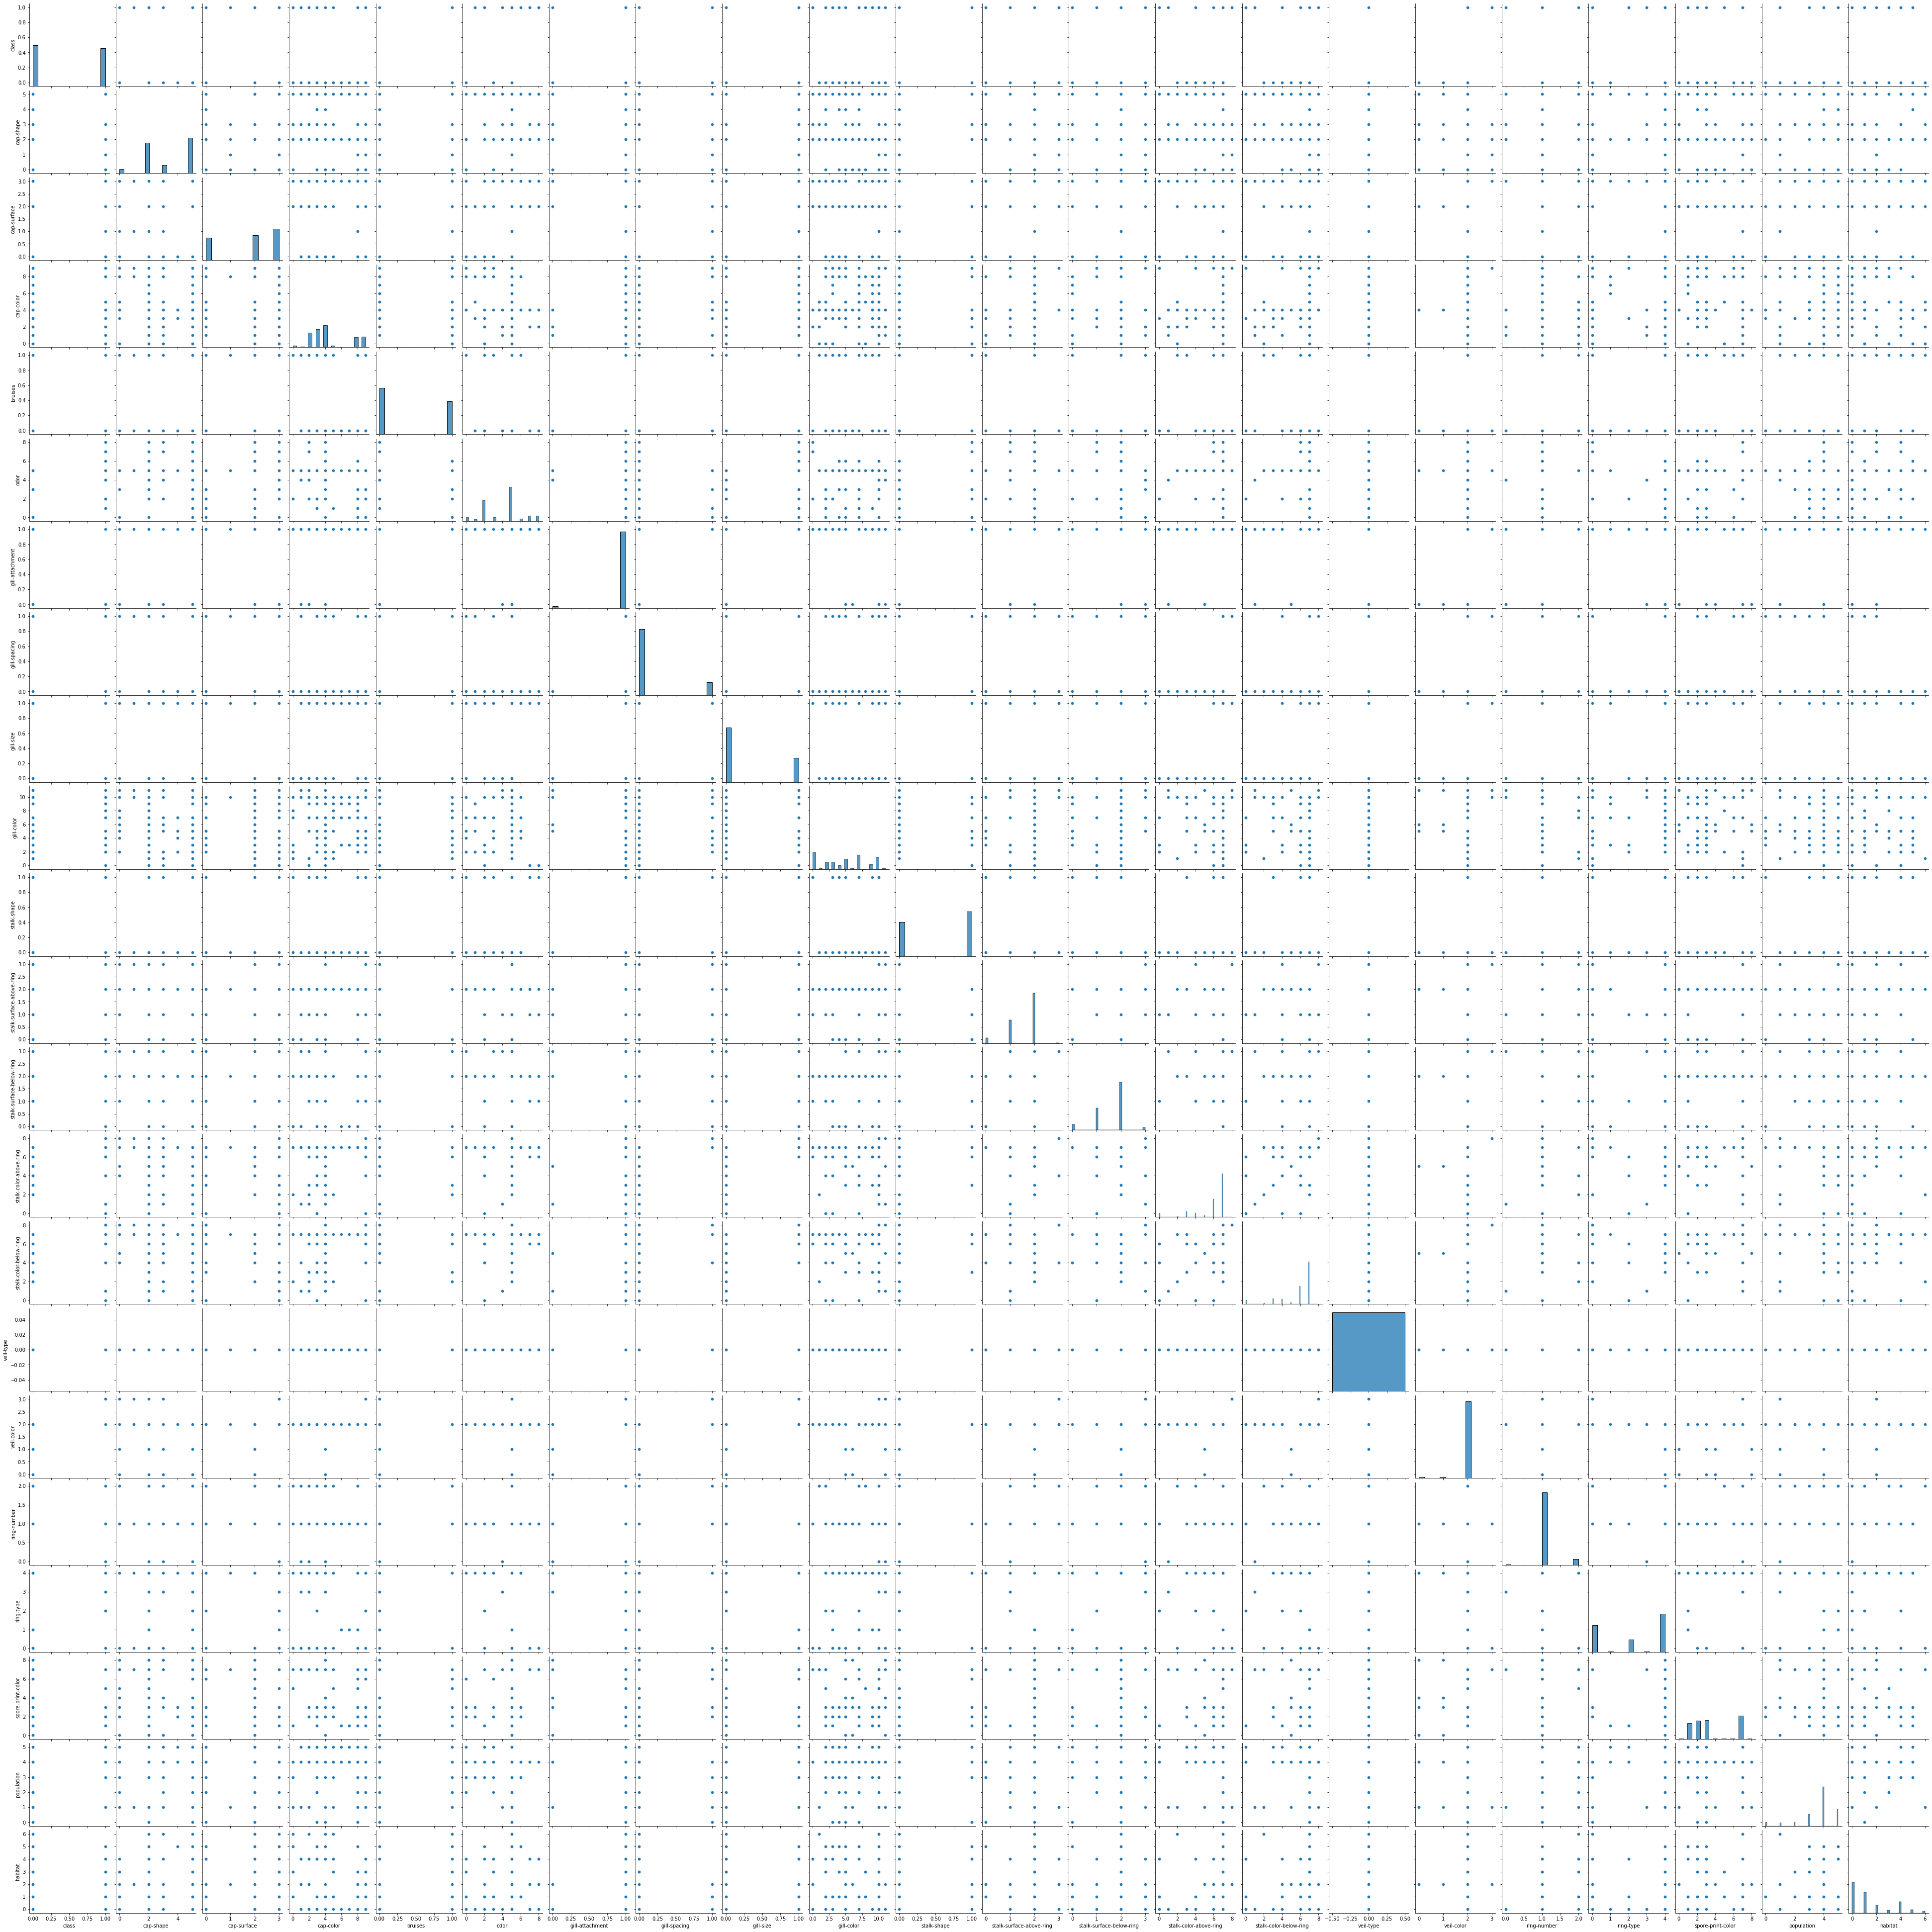

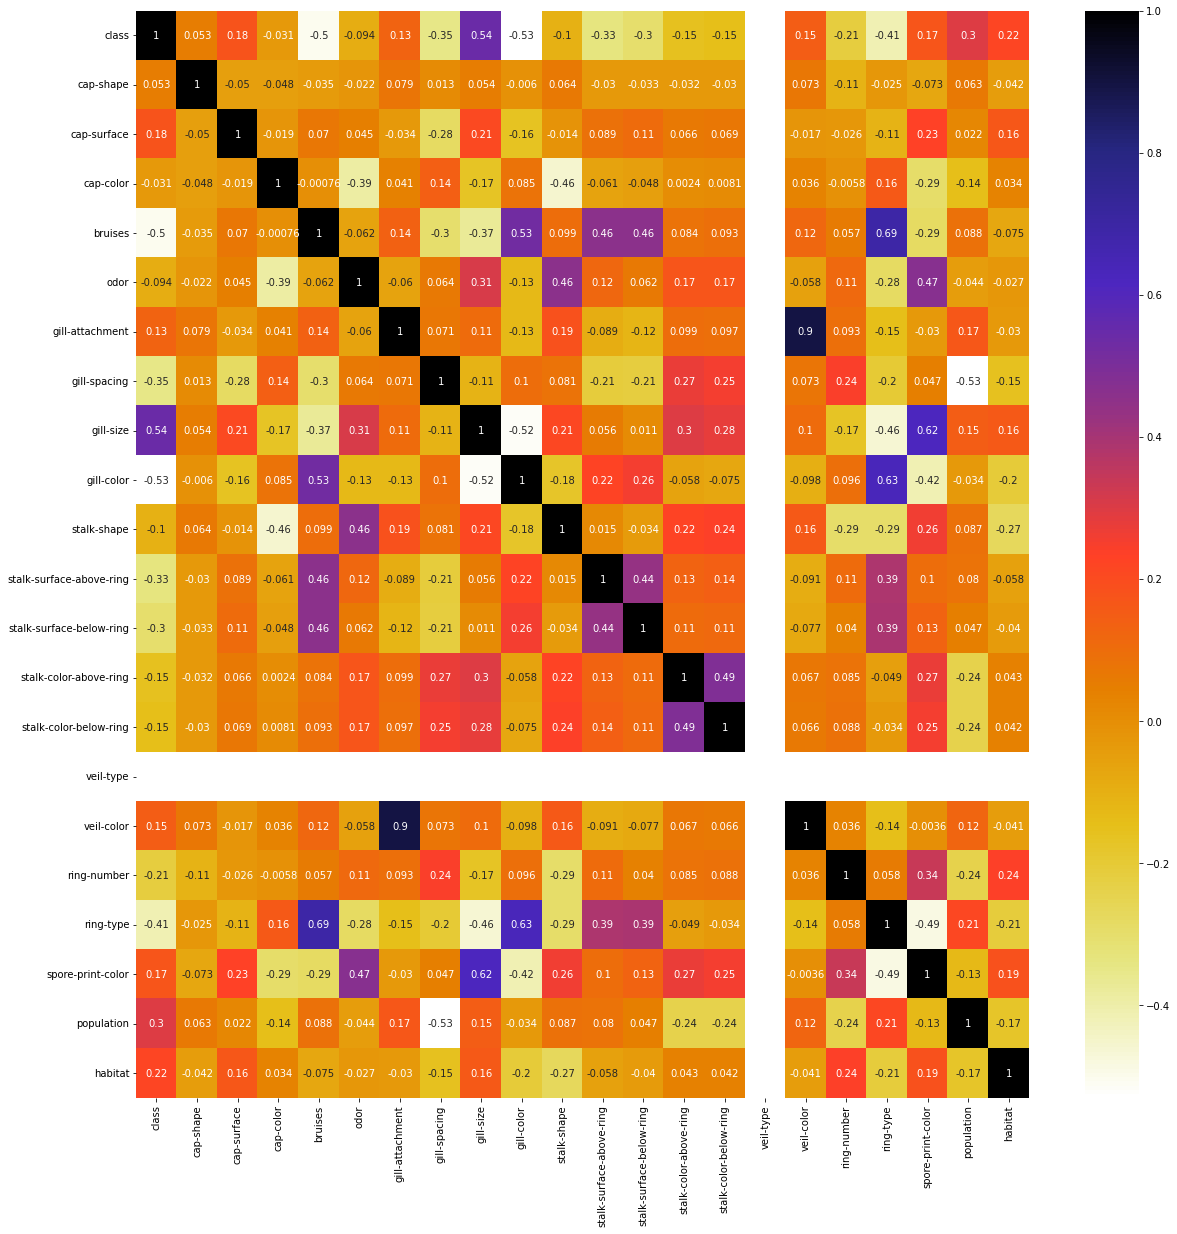

In [10]:
object_visuals.visualize()

# Model


In [19]:
class model:
  def all_models(self):
    X= com.iloc[:,1:]
    y = com.iloc[:,0]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20,random_state = 42)

    print("DecisionTreeClassifier\n")
    tree = DecisionTreeClassifier(max_depth=12,min_samples_split=10,min_samples_leaf=5)
    tree.fit(X_train,y_train)
    y_lr = tree.predict(X_test) 
    print("The training score is: ", tree.score(X_train,y_train),"\n")            
    print("The accuracy is: {}".format(accuracy_score(y_test,y_lr)),"\n")        
    print("The confusion matrix: ")                                            
    dt = confusion_matrix(y_test,y_lr)
    print(dt,'\n')

    TP = dt[0][0]
    FP= dt[0][1]
    FN = dt[1][0]
    TN = dt[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for DecisionTreeClassifier is {}".format(result))
    pickle.dump(tree,open('DecisionTreeClassifier.pkl','wb'))

    print("-------------------------------------------------")

    print("KNEAREST NEIGHBORS\n",'\n')                                          # KNEAREST NEIGHBORS model
    knn= KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_knn = knn.predict(X_test)
    print("The training score is: ", knn.score(X_train,y_train),'\n' )          # Checking training score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_knn)),'\n')      # Printing Accuracy_score 
    print("The confusion matrix: ")                                             # Printing Confusion_Matrix 
    knn_c = confusion_matrix(y_test,y_knn)
    print(knn_c,'\n')

    TP = knn_c[0][0]
    FP= knn_c[0][1]
    FN = knn_c[1][0]
    TN = knn_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for KNEAREST NEIGHBORS is {}".format(result))

    print("-------------------------------------------------")

    print("XGBOOST\n",'\n')                                                     # XGBOOST model
    xgb=XGBClassifier(eta=0.2, max_depth=10, max_leaf_nodes=5)
    xgb.fit(X_train,y_train)
    y_xgb = xgb.predict(X_test)  
    print("The training score is: ", xgb.score(X_train,y_train),'\n' )          # Checking Training_score
    print("The accuracy is: {}".format(accuracy_score(y_test,y_xgb)),'\n')      # Printing Accuracy_score 
    print("The confusion matrix: ")   
    x_c = confusion_matrix(y_test,y_xgb  )                                      # Printing Confusion_Matrixx_c = confusion_matrix(y_test,y_xgb)
    print(x_c,'\n')

    TP = x_c[0][0]
    FP = x_c[0][1]
    FN = x_c[1][0]
    TN = x_c[1][1]
    def math_correlation(tp,fp,fn,tn):
      a = (tp*tn)-(fp*fn)
      b = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
      return a/b
    result =  math_correlation(TP,FP,FN,TN)
    print("The math corelation for XGBOOST is {}".format(result))         # Printing Math_correlation

obj_model = model()

In [20]:
obj_model.all_models()

DecisionTreeClassifier

The training score is:  1.0 

The accuracy is: 1.0 

The confusion matrix: 
[[843   0]
 [  0 782]] 

The math corelation for DecisionTreeClassifier is 1.0
-------------------------------------------------
KNEAREST NEIGHBORS
 

The training score is:  0.9996922603477458 

The accuracy is: 0.9963076923076923 

The confusion matrix: 
[[837   6]
 [  0 782]] 

The math corelation for KNEAREST NEIGHBORS is 0.9926341434626619
-------------------------------------------------
XGBOOST
 

The training score is:  1.0 

The accuracy is: 1.0 

The confusion matrix: 
[[843   0]
 [  0 782]] 

The math corelation for XGBOOST is 1.0
